## CPE 019 - Assignment 9.1 - Convolutional Neural Network


**Names:** SERRANO, Jio A.<br>
**Course and Section:** CPE019 - CPE32S3 <br>
**Date of Submission**: April 27, 2024<br>
**Instructor:** Engr. Roman Richard<br>


### About the Dataset

#### Fashion-MNIST Clothing Classification

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes [1]. The said dataset can be used for training image classification models and was created to replace the existing MNIST dataset [2].

Dataset can be accessed here: https://github.com/zalandoresearch/fashion-mnist

[1] Zalando Research, “Fashion MNIST,” Kaggle.com, 2017. https://www.kaggle.com/datasets/zalando-research/fashionmnist (accessed Apr. 27, 2024).

[2] zalandoresearch, “GitHub - zalandoresearch/fashion-mnist: A MNIST-like fashion product database. Benchmark,” GitHub, 2017. https://github.com/zalandoresearch/fashion-mnist (accessed Apr. 27, 2024).
‌
‌

#### Dataset Classes

The dataset has a total of 10 classes and are named as follows [3]:

* 0 - t-shirt/top
* 1 - trouser/pants
* 2 - pullover
* 3 - dress
* 4 - coat
* 5 - sandal
* 6 - shirt
* 7 - sneaker
* 8 - bag
* 9 - ankle boot

[3] K. Team, “Keras documentation: Fashion MNIST dataset, an alternative to MNIST,” Keras.io, 2024. https://keras.io/api/datasets/fashion_mnist/ (accessed Apr. 27, 2024).
‌
‌

#### Loading the Dataset

In [ ]:
from matplotlib import pyplot
from keras.datasets import fashion_mnist

# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


**Remarks**: We can see from the above results that the images has a dimensions of 28 by 28 units (assuming pixels).

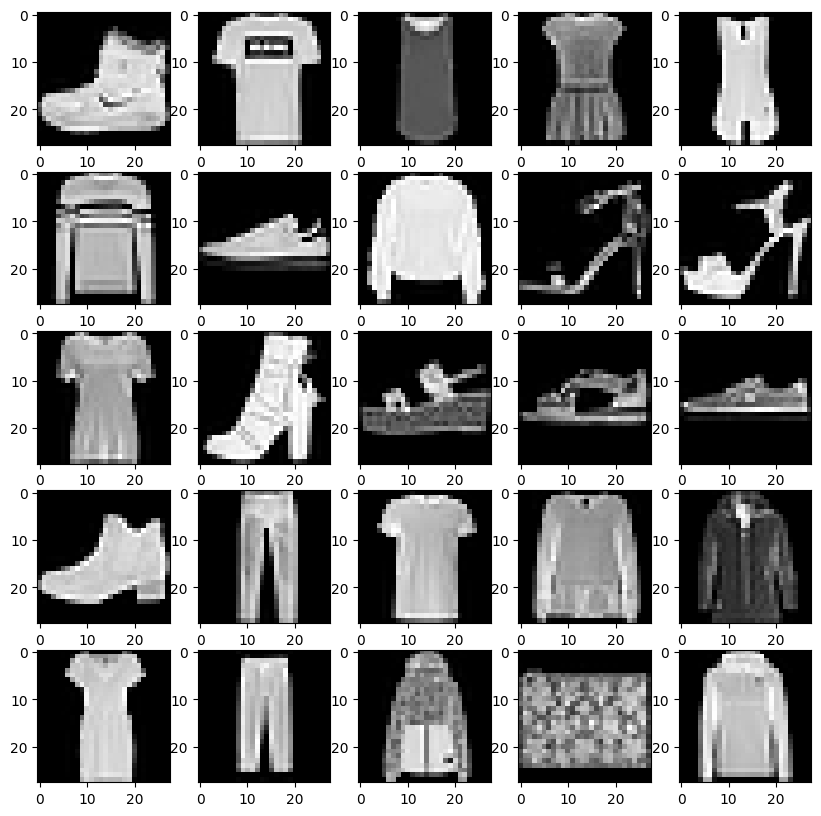

In [ ]:
import matplotlib.pyplot as plt

# Plotting some of the images from the dataset

rows = 5
cols = 5

plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  plt.subplot(rows, cols, i+1)
  plt.imshow(trainX[i].reshape(28, 28), cmap='gray')
plt.show()


In [ ]:
import numpy as np
values, counts = np.unique(trainy, return_counts=True)

for value, count in zip(values, counts):
  print(f"Value: {value}, Count: {count}")

Value: 0, Count: 6000
Value: 1, Count: 6000
Value: 2, Count: 6000
Value: 3, Count: 6000
Value: 4, Count: 6000
Value: 5, Count: 6000
Value: 6, Count: 6000
Value: 7, Count: 6000
Value: 8, Count: 6000
Value: 9, Count: 6000


**Remarks**: There are 10 classes in the given dataset, each of the class is a name of the clothing and is encoded int 0-9 values. As seen above, the number of instances per class is 6000. The images in the dataset all have the same size of 28x28 pixels that are in grayscale.

### Creating Baseline Model for CNN

In [ ]:
# Reshaping dataset

trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

#### One-Hot Encoding the Labels

In [ ]:
from keras.utils import to_categorical

trainy = to_categorical(trainy)
testy = to_categorical(testy)

print(trainy.shape)

(60000, 10)


In [ ]:
trainy.shape

(60000, 10)

**Remarks**: One-hot encoding eliminates the presence of possible bias by converting the categorical data into an identity matrix instead of just converting them into unique integer values.

GeeksforGeeks. (2019, June 12). One Hot Encoding in Machine Learning. GeeksforGeeks; GeeksforGeeks. https://www.geeksforgeeks.org/ml-one-hot-encoding/


#### Normalizing Pixel Values

In this section, the pixel values will be normalized to have a value in the range of [0, 1]. This is the equivalent of feature scaling for image datasets [3].

[3] J. Brownlee, “Deep Learning CNN for Fashion-MNIST Clothing Classification - MachineLearningMastery.com,” MachineLearningMastery.com, May 09, 2019. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/ (accessed Apr. 27, 2024).
‌

In [ ]:
# scale pixels
def scale_pixels(train, test):
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')

 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0

 # return normalized images
 return train_norm, test_norm

In [ ]:
trainX_norm, testX_norm = scale_pixels(trainX, testX)

In [ ]:
trainX_norm.shape

(60000, 28, 28, 1)

#### Defining the Baseline CNN Model

In [ ]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.03, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

**Remarks**: In the above baseline model, the output layer is composed of 10 nodes representing the 10 different classes in the dataset. The `relu` activation function was used for the layers except for the output layer which will use the `softmax` activation function ideal for multiclass classification problems like this one. The `he_uniform` kernel initializer for adhering to the best practices as well [3].

The filter size used is (3,3), which is in accordance to good practices in convolutional neural networks [4].

[4] J. Brownlee, “Crash Course in Convolutional Neural Networks for Machine Learning - MachineLearningMastery.com,” MachineLearningMastery.com, Jun. 23, 2016. https://machinelearningmastery.com/crash-course-convolutional-neural-networks/ (accessed Apr. 27, 2024).
‌

### Image Augmentation

This section performs the image augmentation for the dataset. It allows us to increase the size of the dataset without the need to acquire new images [5]. Image augmentation will duplicate images and perform slight variations on the duplicates for the model to learn on [5].

[5] O. Data, “Image Augmentation for Convolutional Neural Networks,” Medium, Jul. 29, 2019. https://odsc.medium.com/image-augmentation-for-convolutional-neural-networks-18319e1291c#:~:text=Image%20augmentation%20is%20one%20useful%20technique%20in%20building,so%20the%20model%20can%20learn%20from%20more%20examples. (accessed Apr. 27, 2024).
‌

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [ ]:
trainX_norm_reshaped = trainX_norm.reshape(trainX.shape[0], 28, 28, 1)
datagen.fit(trainX_norm_reshaped)

In [ ]:
X_batch = datagen.flow(trainX_norm_reshaped, trainX_norm_reshaped, batch_size=32)
y_batch = datagen.flow(trainX_norm_reshaped, trainX_norm_reshaped, batch_size=32)

In [ ]:
baseline_model = define_model()
baseline_model.fit(datagen.flow(trainX_norm_reshaped, trainy, batch_size=32),
                   steps_per_epoch=len(trainX_norm_reshaped) // 32,
                   epochs=20)

Epoch 1/20
1875/1875 [==============================] - 48s 24ms/step - loss: 0.4171 - accuracy: 0.8573
Epoch 2/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2728 - accuracy: 0.8994
Epoch 3/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2346 - accuracy: 0.9126
Epoch 4/20
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2071 - accuracy: 0.9226
Epoch 5/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1827 - accuracy: 0.9306
Epoch 6/20
1875/1875 [==============================] - 56s 30ms/step - loss: 0.1619 - accuracy: 0.9382
Epoch 7/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1450 - accuracy: 0.9447
Epoch 8/20
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1305 - accuracy: 0.9507
Epoch 9/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1179 - accuracy: 0.9556
Epoch 10/20
1875/1875 [==============================] - 45s 24m

### Feature Standardization

-2.4011555 0.05631777 7.557218


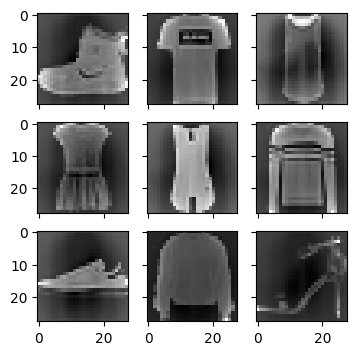

In [ ]:
# Standardize images across the dataset, every pixel has mean=0, stdev=1
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.mean = trainX_norm_reshaped.mean(axis=0)
datagen.std = trainX_norm_reshaped.std(axis=0)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(trainX_norm_reshaped, trainy, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

**Remarks**: In the above code, the feature standardization was computed manually, providing a wider range for the minimum, mean, and maximum values of -2.4011555, 0.05631777, and 7.557218, respectively.

#### Point of Comparison

This section shows some of the images from the original dataset without augmentation.

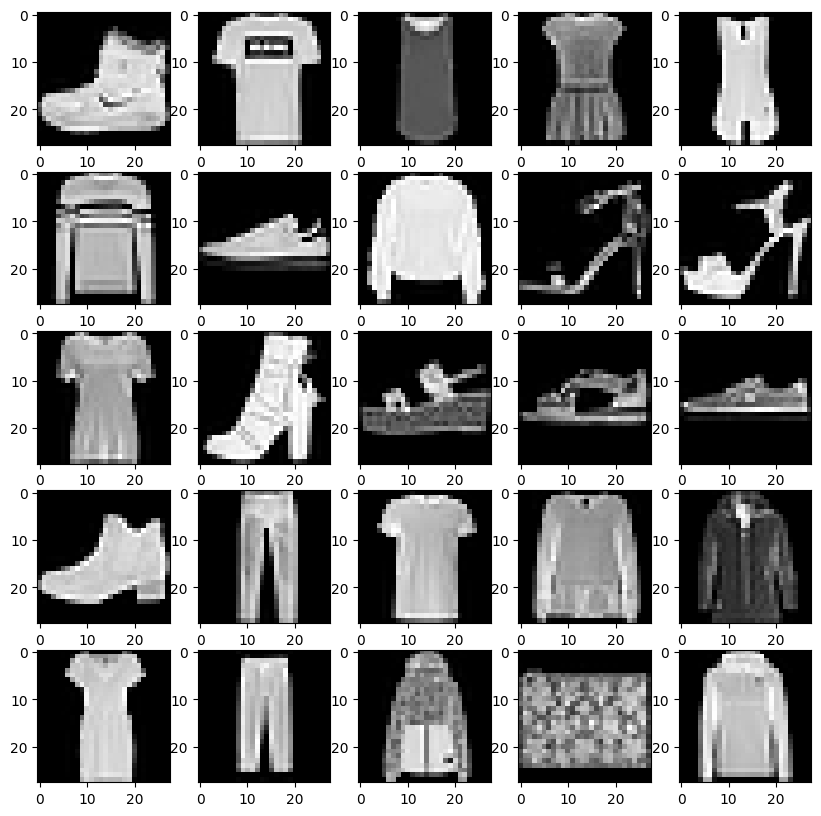

In [ ]:
rows = 5
cols = 5

plt.figure(figsize=(10, 10))
for i in range(rows*cols):
  plt.subplot(rows, cols, i+1)
  plt.imshow(trainX[i].reshape(28, 28), cmap='gray')
plt.show()


### ZCA Whitening

In this section, ZCA whitening will be performed on the dataset. ZCA whitening is an image pre-processing technique that transforms the data such that the covariance matrix will be the identity matrix that results to decorrelated features [6]. In this section, we have performed ZCA whitening by setting the `zca_whitening` parameter of the `ImageDataGenerator` function to be True.

[6] “Papers with Code - ZCA Whitening Explained,” Paperswithcode.com, 2020. https://paperswithcode.com/method/zca-whitening (accessed Apr. 27, 2024).
‌

-7.6035585 0.004581748 13.20906


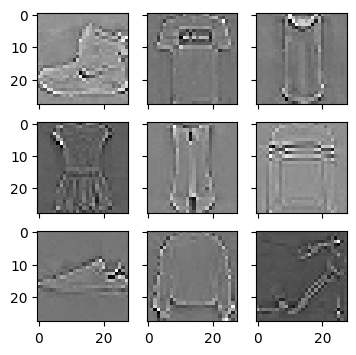

In [ ]:
# ZCA Whitening
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)
X_mean = trainX_norm_reshaped.mean(axis=0)
datagen.fit(trainX_norm_reshaped - X_mean)
for X_batch, y_batch in datagen.flow(trainX_norm_reshaped - X_mean, trainy, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    plt.show()
    break

**Remarks**: What ZCA whitening did was it transformed the features, in this case, the pixels of the image to have zero mean and unit variance, and at the same time, decorrelated them [7]. Hence, as a result, we can still see the structure of the image with  their outlines being emphasized by a bit.

[7] D. P. Kingma and J. L. Ba, "Adam: A method for stochastic optimization," arXiv preprint arXiv:1412.6980, 2014. https://arxiv.org/abs/1412.6980

### Augmenting Data with Random Rotations, Shifts, and Flips

#### Random Rotations

In this section, we will set the `rotation_range` parameter of the `ImageGenerator()` function to a value. What this does is that the image dataset will be rotated as some angles.

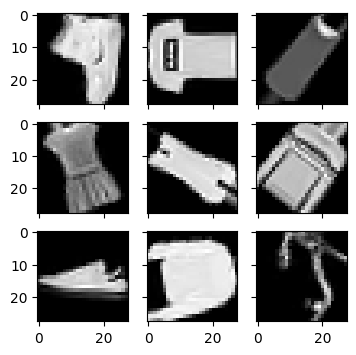

In [ ]:
# Random Rotations
datagen = ImageDataGenerator(rotation_range=90)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(trainX_norm_reshaped, trainy, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

**Remarks**: As expected in the results above, the images from the image dataset were rotated at some angles.

#### Random Shifts

In this section, a `width_shift_range` and `height_shift_range` values will be set for the `ImageDataGenerator` function. What this does is that the subject of the image will be moved or shifted horizontally or vertically at some values specified by the value of the `shift` variable.

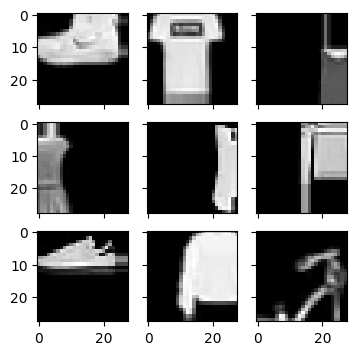

In [ ]:
# Random Shifts
shift = 0.5
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(trainX_norm_reshaped, trainy, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

**Remarks**: In the above results, we can see that the images from the image dataset have been shifted horizontally and vertically.

#### Random Flips

In this section, the `horizontal_flip` and `vertical_flip` parameters of the `ImageDataGenerator` will be set to `True`. Doing so will flip or invert the image either horizontally or vertically at random.

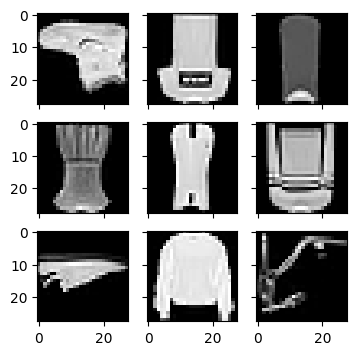

In [ ]:
# Random Flips
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(trainX_norm_reshaped, trainy, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

**Remarks**: Overall, in the above cells, we have performed image augmentation by manipulating the parameters of the `ImageGenerator()` function. Image augmentation can be considered an important step in training image classification models to make it more robust to changes [8].

[8] M. Iceland and C. Kanan, “Understanding the Benefits of Image Augmentations,” arXiv.org, 2023. https://arxiv.org/abs/2306.06254#:~:text=Understanding%20the%20effects%20of%20image%20augmentations%20on%20CNNs,should%20be%20frozen%20when%20implementing%20layer%20freezing%20algorithms. (accessed Apr. 27, 2024).
‌

### Saving Augmented Image to File

In this section, we will be saving the augmented image to a file (Drive). For demonstration, we will be saving the augmented image with random rotations.

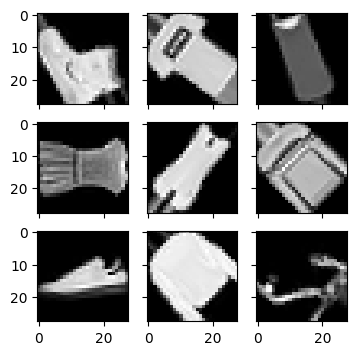

In [ ]:
# Save augmented images to file
datagen = ImageDataGenerator(rotation_range=90)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(trainX_norm_reshaped, trainy, batch_size=len(trainX_norm_reshaped), shuffle=False,
                                     save_to_dir='/content/drive/MyDrive/HOA 9/DATA/aug_images/', save_prefix='aug', save_format='png'):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

#### Saved File:

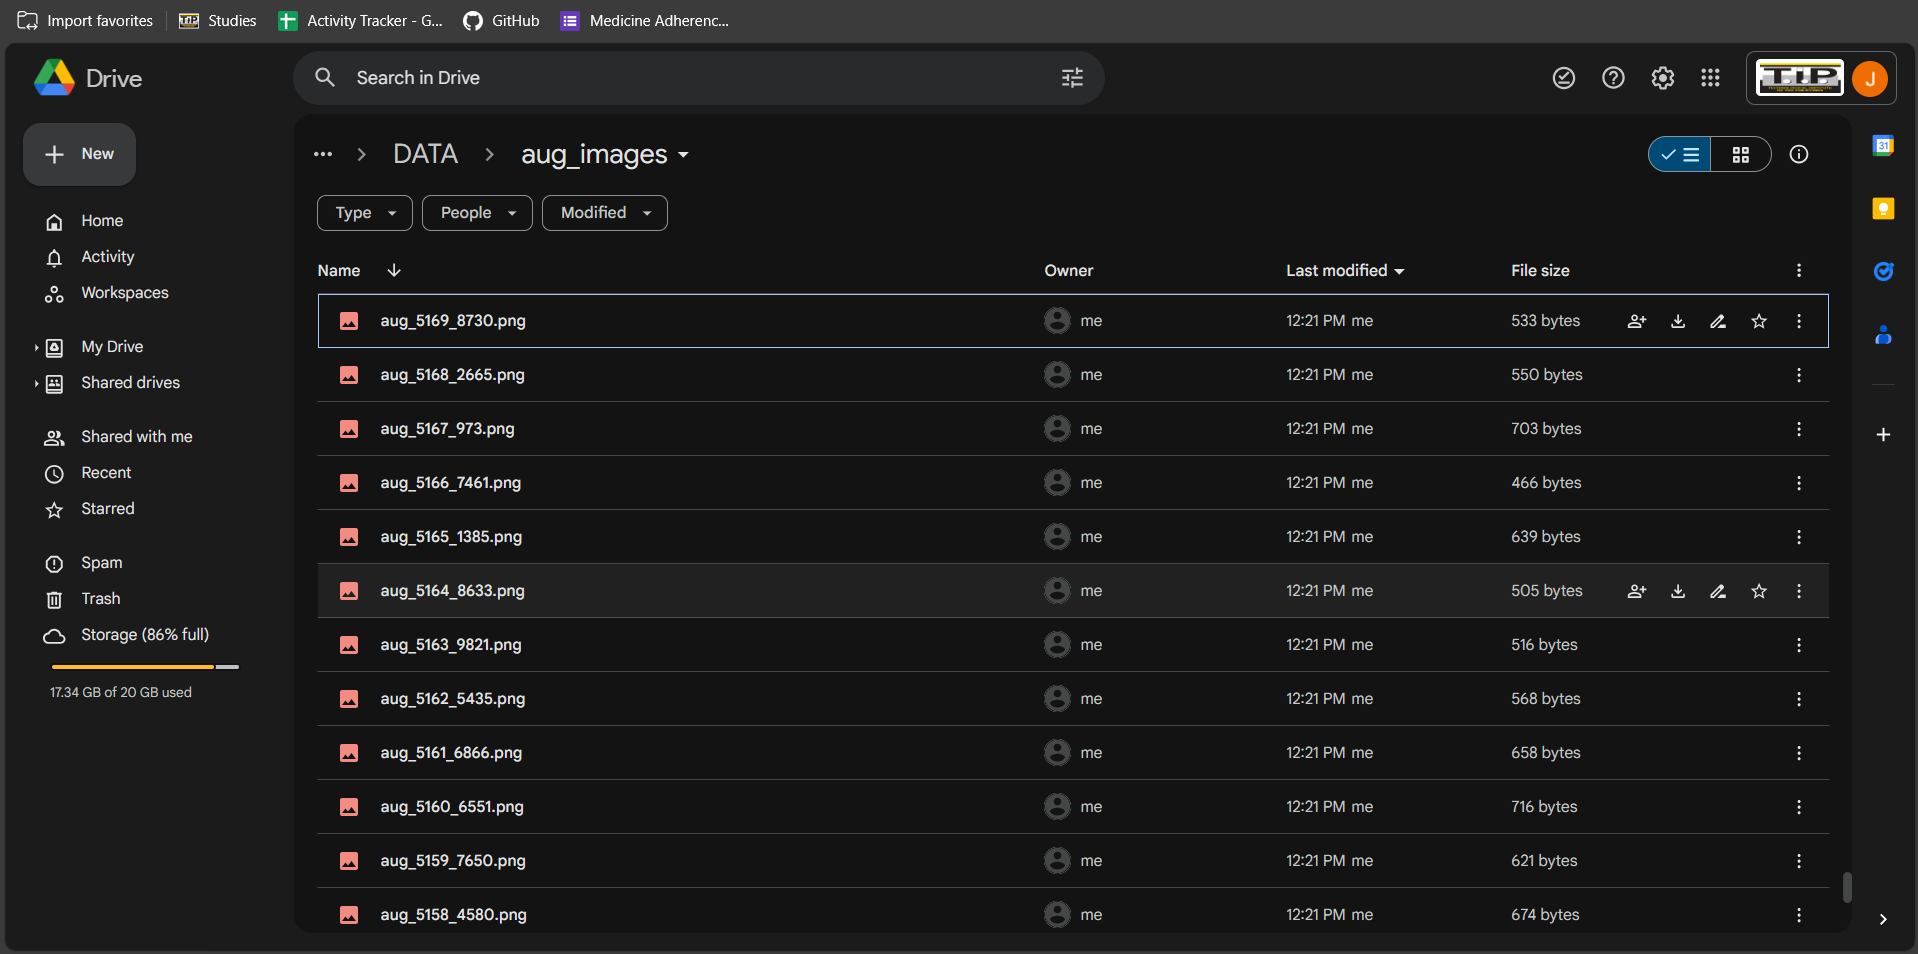

**Remarks**: The augmented images are successfully saved in the specified path as seen above.

### Developing a Test Harness to Develop a Robust Evaluation of a Model and Establish a Baseline of Performance for a Classification Task

In [ ]:
# test harness for evaluating models on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY



In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.03, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

  pyplot.show()

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# fit model
	history = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

> 90.020


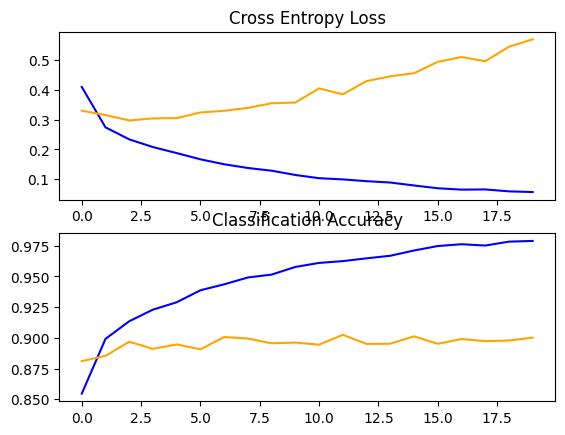

Total time taken: 14.197053996721904 minutes


In [ ]:
import time
start_time = time.time()

# entry point, run the test harness
run_test_harness()

end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time/60, "minutes")

**Remarks**: In the above graph, the orange lines represent the testing dataset results while the blue lines represent the training dataset's.

The result of the model's evaluation above shows us that the model was able to achieve 90.020% accuracy. As expected, the training dataset achieved a better accuracy score based on the visualized graph and a lower losses as compared to the testing dataset.

### Exploring Extensions to a Baseline Model to for Learning and Model Capacity Improvement

In this section, we will explore different model architectures and see if the model will improve or not. We will be exploring different VGG (Visual Geometry Group) typically used for convolutional neural network (CNN) architecture [9].

[9] GeeksforGeeks, “VGG-16 CNN model,” GeeksforGeeks, Feb. 26, 2020. https://www.geeksforgeeks.org/vgg-16-cnn-model/ (accessed Apr. 27, 2024).
‌


#### Variation 1: 1 VGG Block

In [ ]:
# define cnn model
def define_model_vgg1():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.03, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

**Remarks**: For the model above, we have added another layer after the input layer. The `padding` parameter was set to `same` to ensure consistency between the height and width of the output feature maps and the inputs. We will see its performance in the later cells.

In [ ]:
# run the test harness for evaluating a model_vgg1
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model_vgg1
	model_vgg1 = define_model_vgg1()
	# fit model_vgg1
	history = model_vgg1.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model_vgg1
	_, acc = model_vgg1.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

> 90.580


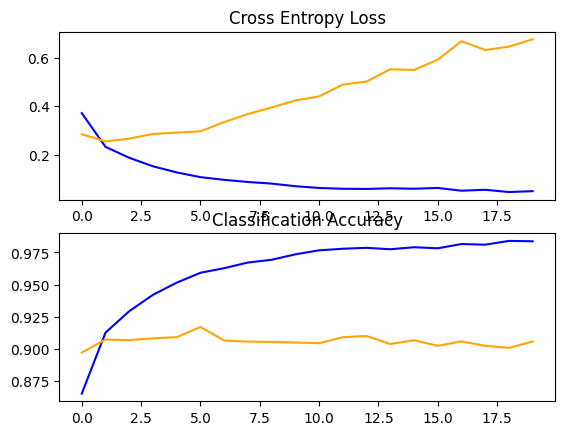

Total time taken: 108.62412648995718 minutes


In [ ]:
import time
start_time = time.time()

# entry point, run the test harness
run_test_harness()

end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time/60, "minutes")

**Remarks**: The variation done has improved the model by a bit, from the baseline model performance of 90.020 to 90.580 on testing accuracy. However, the fitting time took too long---about two hours.

#### Variation 2: 2 VGG Block

This time, we will add a couple of hidden layers to our model and see its performance.

In [ ]:
# define cnn model
def define_model_vgg2():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.03, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# run the test harness for evaluating a model_vgg2
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model_vgg2
	model_vgg2 = define_model_vgg2()
	# fit model_vgg2
	history = model_vgg2.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=0)
	# evaluate model_vgg2
	_, acc = model_vgg2.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

> 90.020


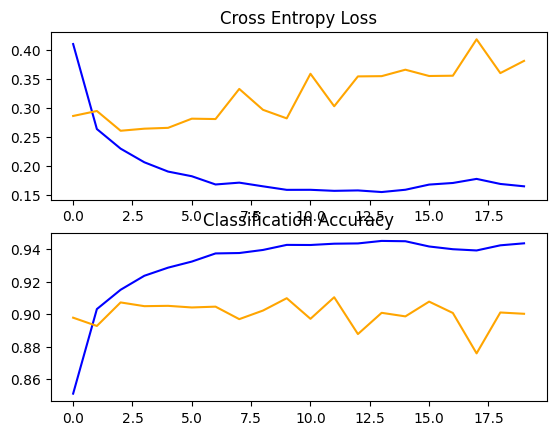

Total time taken: 216.26375395854313 minutes


In [ ]:
import time
start_time = time.time()

# entry point, run the test harness
run_test_harness()

end_time = time.time()

total_time = end_time - start_time
print("Total time taken:", total_time/60, "minutes")

**Remarks**: Adding more layers in the model did not improve the model's raining accuracy based on the results above. The accuracy went from 90.580 to 90.020, similar to the baseline model's performance. However, we can see that the model's performance is more unstable compared to the baseline model, suggesting that adding more layers does not really suit the model's behavior. Tha fitting of this model took almost four hours of runtime.

### Developing and Evaluating a Finalized Model and Making Predictions

For the final model, I will modify the learning rate from 0.03 to 0.02, still apply the same `padding` parameter. I will also add a Dropout in the hidden layer to help reduce overfitting.

#### Creating and Saving Final Model

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

  # scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model_final():
  model = Sequential()
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.02, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

  pyplot.show()

In [ ]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)
# define model
final_model = define_model_final()
# fit model
history_final = final_model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=0)
# save model
final_model.save('/content/drive/MyDrive/HOA 9/final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##### Saved Model

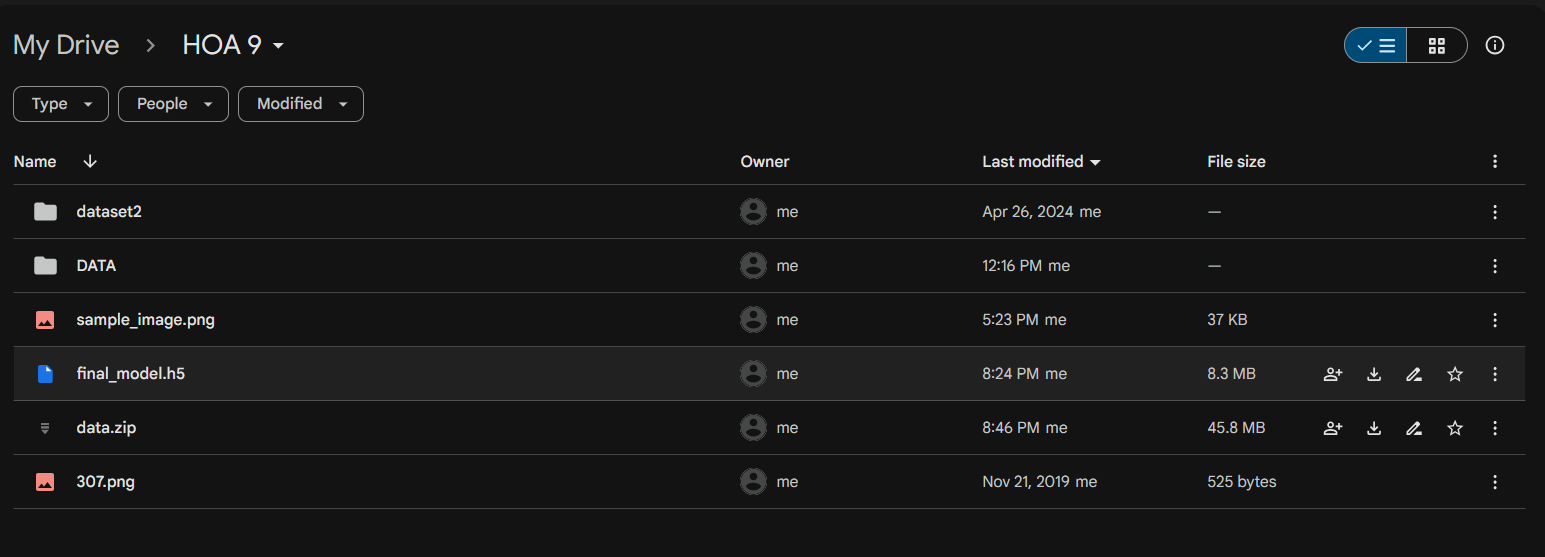

**Remarks**: The model is successfully saved in the drive as seen in the screenshot above. This model will then be loaded later on for making a prediction on a sample image.

#### Evaluating Final Model

> 90.630


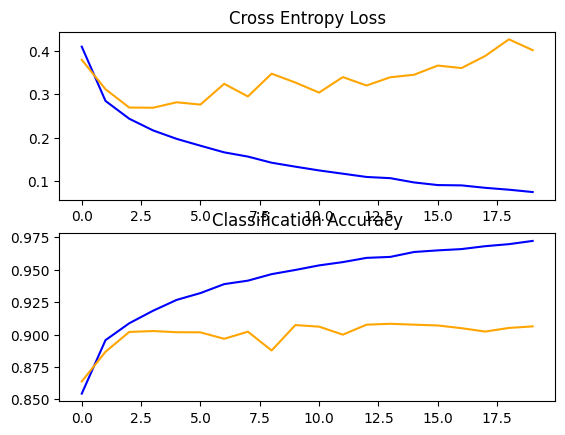

In [ ]:
_, acc = final_model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))
summarize_diagnostics(history_final)

**Remarks**: The final model has obtained the test accuracy of 90.630, the highest among all the other model tested before. This model will then be used to make predictions on a sample image from the test dataset.

#### Summary of Model Test Accuracy

The table below shows the test accuracy and time taken by all the models used in this activity.

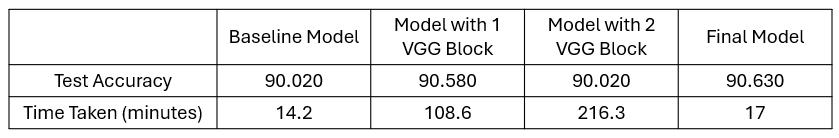

#### Make Predictions using Final Model

##### Sample Image

The sample image is from the test dataset, an unseen part of the dataset. Based on the image, the expected result would be 2, which is the class for pullover.

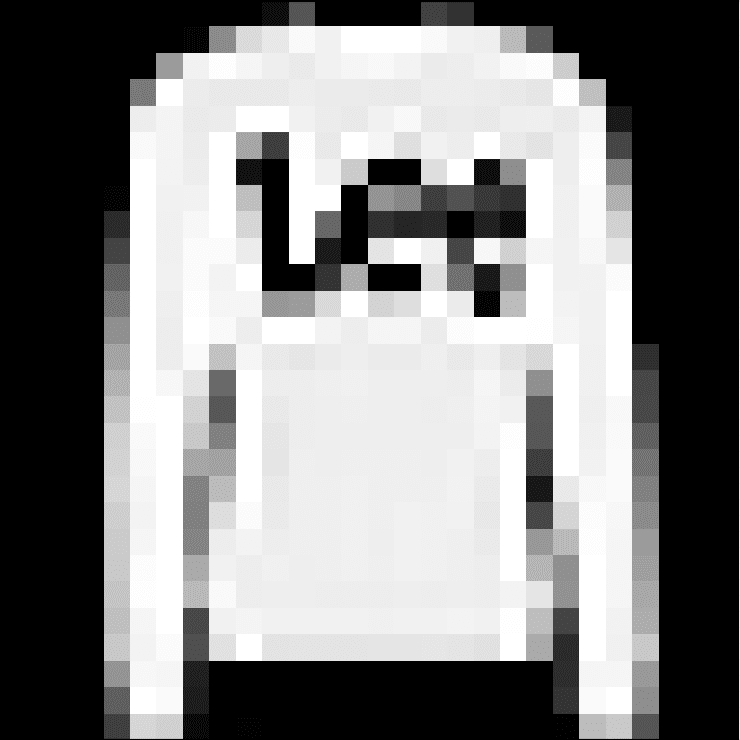

**Remarks**: Shown above is an image of a pullover, hence, we expect the model to return a value of **2** representing the class "pullover".

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

def load_image(filename):
  # load the image
  img = load_img(filename, grayscale=True, target_size=(28, 28))
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28, 1)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  return img

In [ ]:
# load an image and predict the class
def run_example(image_path):
  # load the image
  img = load_image(image_path)
  # load model
  model = load_model('/content/drive/MyDrive/HOA 9/final_model.h5')
  # predict the class
  result = np.argmax(model.predict(img), axis=-1)
  print(f'Class: {result}')

In [ ]:
run_example('/content/drive/MyDrive/HOA 9/sample_image.png')

/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
Class: [2]


We will try to predict another image, as shown below, the expected result would be the 9, which is the class for ankle boot.

307.png

In [ ]:
run_example('/content/drive/MyDrive/HOA 9/307.png')

1/1 [==============================] - 0s 58ms/step
Class: [9]


**Remarks**: Based on the result above of 2 and 9 from the two tests, the model was able to correctly identify the classes of the testing images passed to it.

### Conclusion and Lessons Learned

In this activity, I have learned to create and evaluate a convolutional neural network model for classifying images. I have also managed to performed different data treatment on image classification datasets such as feature standardization and image augmentation for making the model more robust. From the activity, I have concluded the following:

* Fitting the model takes a lot of time, some take literal days before completing the fitting. Hence, it is important to always double check the code before running it, running the program only for it to result to an error is a waste of time.

* Image classification problems require a different set of pre-processing techniques as compared to regular classification and regression problems. As we are dealing with images with pixels as their features, feature standardization is done in the pixels themselves.

* Image augmentation allows us to increase our dataset by creating duplicates of our existing images in the dataset and adding variations to them. This can be easily done using the `ImageDataGenerator` function and modifying its parameters. Augmenting the images will allow the model to be trained on a more diversed dataset, making it more robust to changes such as rotational and shift changes.

* As in the previous activities, it is also important to do our research on the different parameters used on the model that we are creating. These parameters may be more suitable to specific types of datasets and might result to errors when used incorrectly.